# Proyecto UD3
#### UD3. Aprendizaxe Non Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Entrega en el moodle el fichero notebook solución así como un pdf generado con el contenido del notebook y su ejecución.

### Dataset: Países

Nuestro gallego de oro, Amancio Ortega, ha cumplido 87 años y le da vueltas a cuál será su legado en este mundo.
Es por ello, que ha contactado con el IES de Teis para que le ayudemos a identicar aquellos países más necesitados teniendo en cuenta factores socio-económicos y de salud para determinar el estado de cada país.
Una vez categorizados, la Fundación Ortega podrá abrir hospitales, escuelas y comedores sociales en dichos países.

Disponemos de un dataset con la información mundial de 166 países.

Lista de atributos para cada país:

* país: nombre del país
* mort_inf: número de niños menores de 5 años muertos por cada 1000 nacimientos
* exportaciones: exportaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* salud: gasto total en salud per cápita. Expresado como % del PIB per cápita
* importaciones: importaciones de bienes y servicios per cápita. Expresado como % del PIB per cápita
* ingresos: ingresos netos por persona
* inflacion: la medida de la tasa de crecimiento anual del PIB total
* esp_vida: La cantidad promedio de años que viviría un niño recién nacido si los patrones de mortalidad actuales se mantuvieran iguales
* num_hijos: el número de hijos que nacerían de cada mujer si las tasas actuales de fecundidad por edad se mantuvieran iguales.
* pib: el PIB per cápita. Calculado como el PIB total dividido por la población total.

A Amancio no le interesan mucho los números ni las gráficas, sino que le extraigas conclusiones de cada uno de los pasos qué realizas y porqué los realizas.

## Importación Librerias

In [372]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Usamos esto para que ignore los warnings.
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score

# from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
import numpy as np

## 1. Importación del dataset

In [373]:
# Leemos el csv 'paises.csv' y lo mostramos
df = pd.read_csv('paises.csv')
df

,pais,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## 2. EDA&Preprocessing

### EDA

In [374]:
# Visualizamos la información del dataframe, pudiendo observar los dtype de cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais           167 non-null    object 
 1   mort_inf       167 non-null    float64
 2   exportaciones  167 non-null    float64
 3   salud          167 non-null    float64
 4   importaciones  167 non-null    float64
 5   ingresos       167 non-null    int64  
 6   inflacion      167 non-null    float64
 7   esp_vida       167 non-null    float64
 8   num_hijos      167 non-null    float64
 9   pib            167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [375]:
# Visualizamos los parámetros estadísticos de cada columna del dataframe.
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [376]:
# Visualizamos las columnas que contiene el dataframe.
df.columns

Index(['pais', 'mort_inf', 'exportaciones', 'salud', 'importaciones',
       'ingresos', 'inflacion', 'esp_vida', 'num_hijos', 'pib'],
      dtype='object')

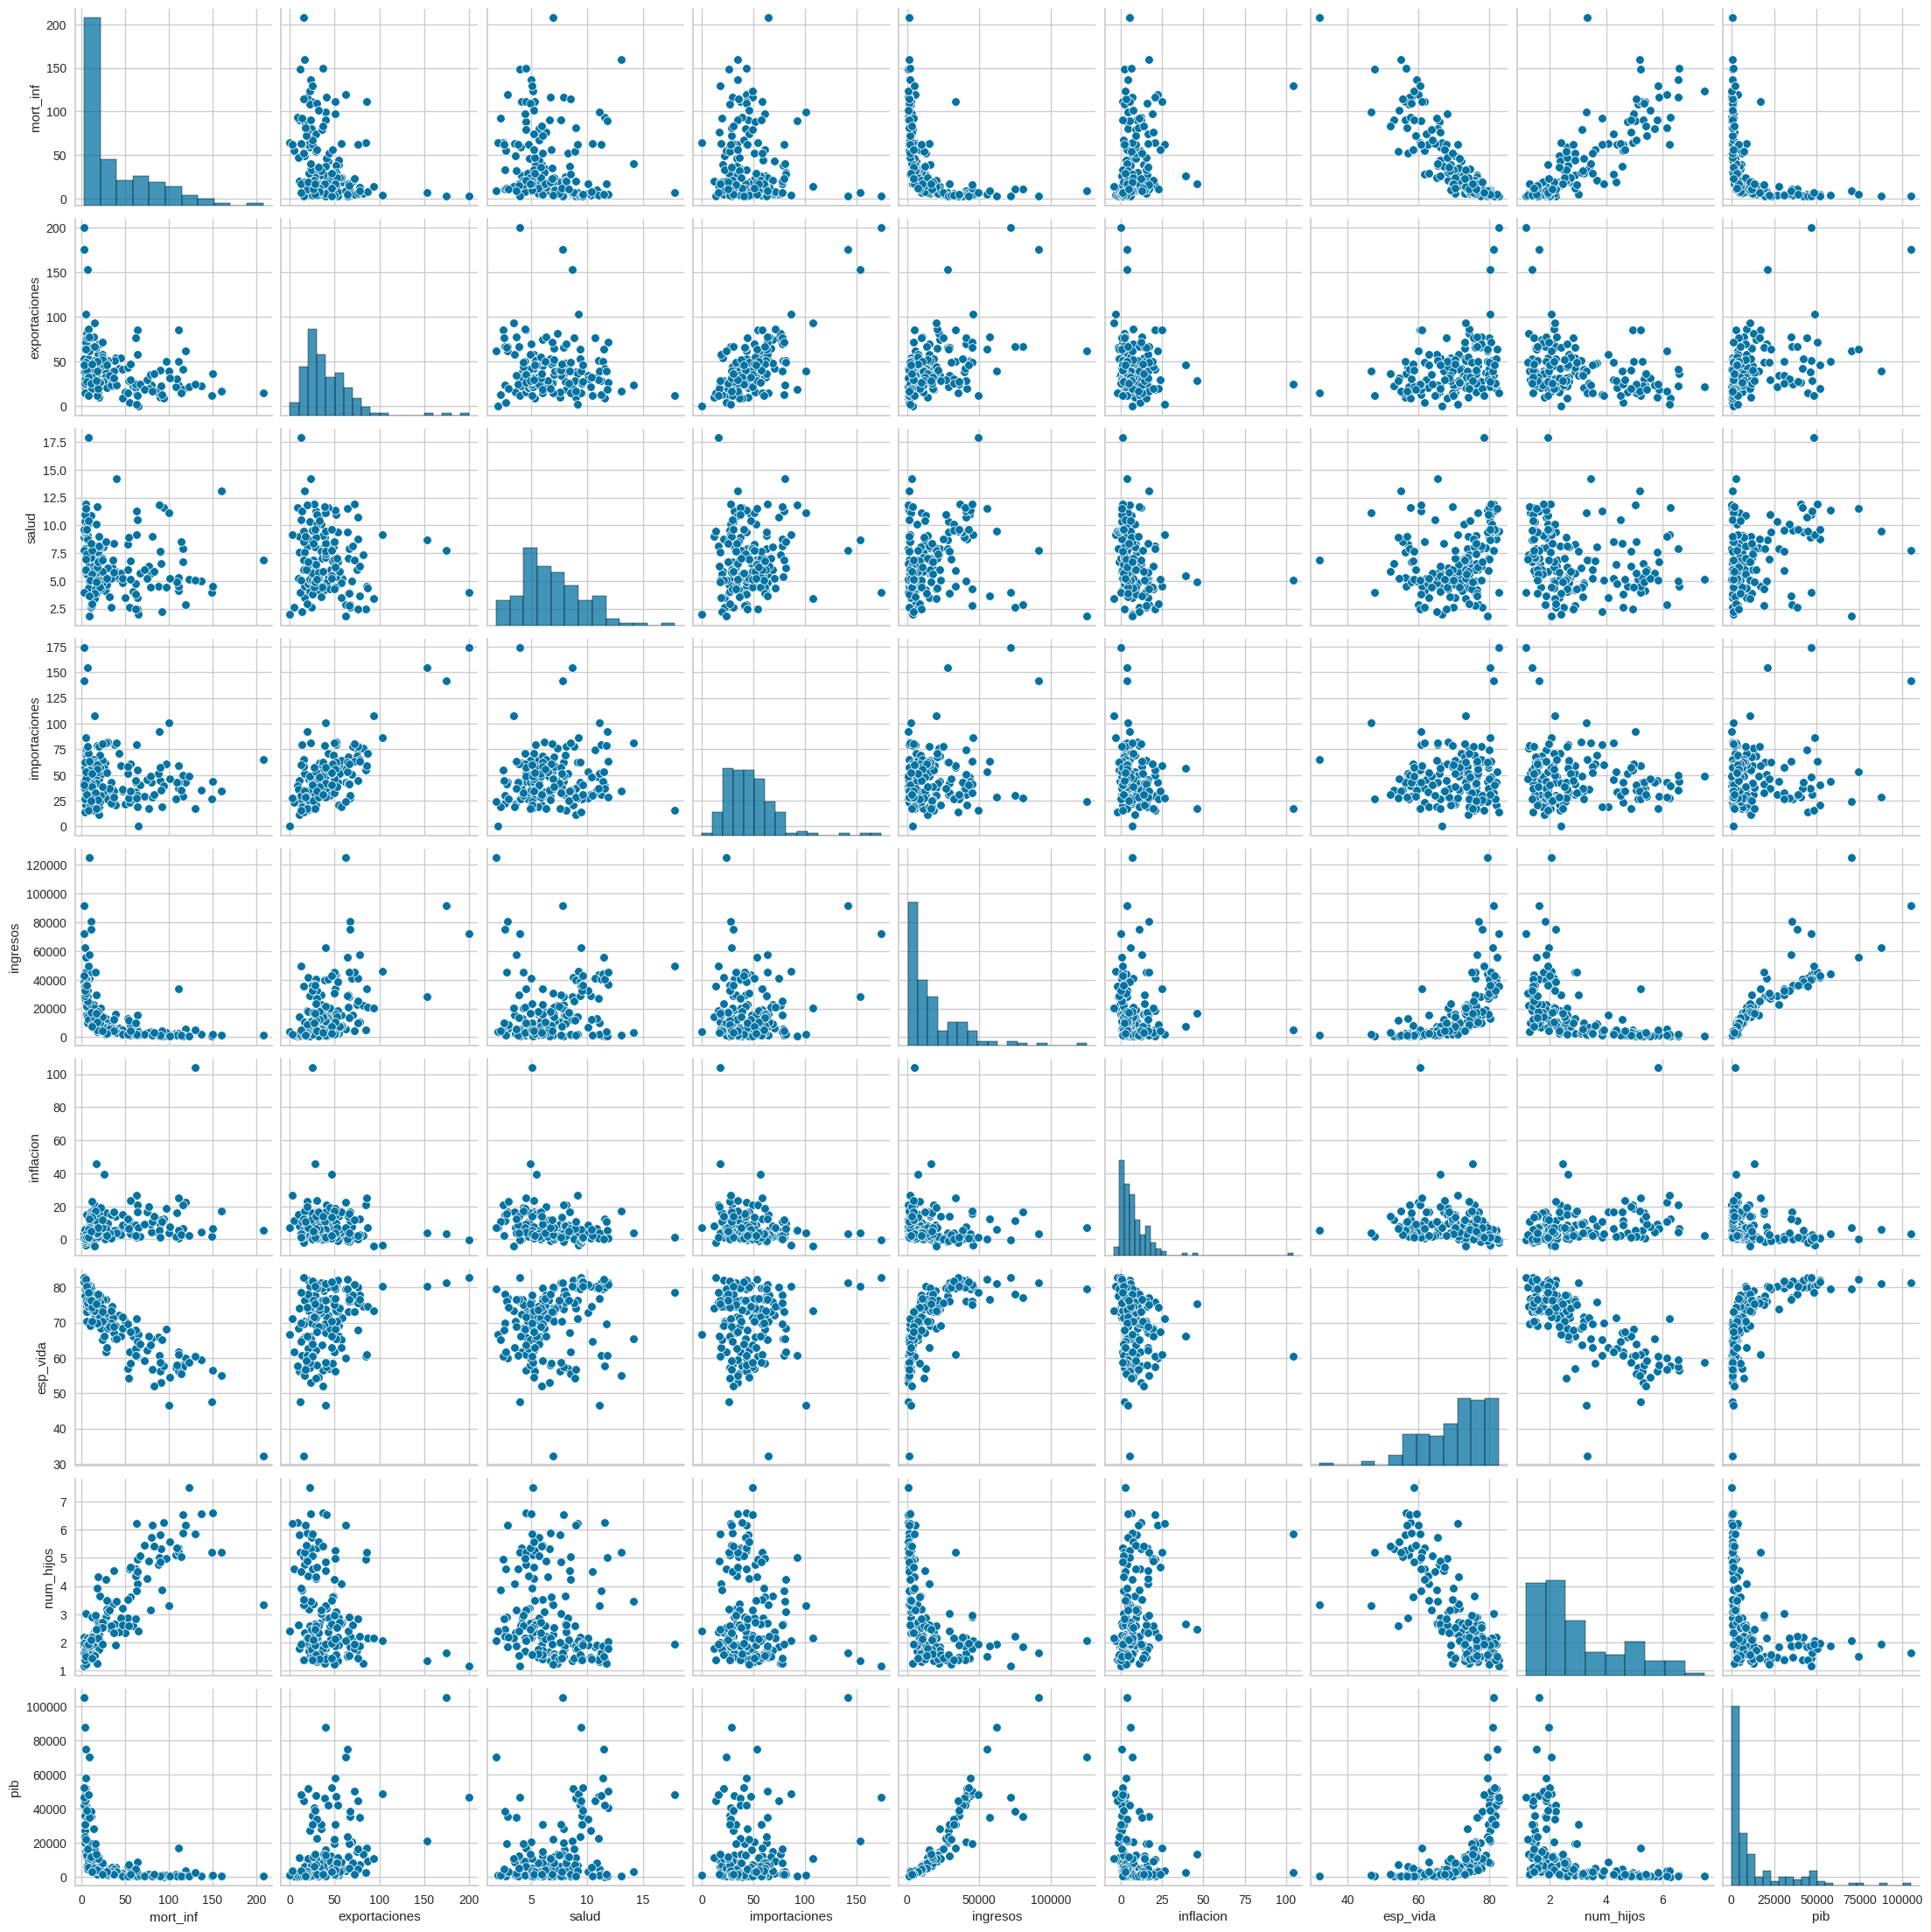

In [364]:
# Visualizamos las relaciones que existen entre las diferentes columnas numericas.
sb.pairplot(df)

In [377]:
# Visualizamos la correlación que existe entre las columnas numéricas.
df.corr(numeric_only=True)

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
mort_inf,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exportaciones,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
salud,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
importaciones,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
ingresos,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflacion,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
esp_vida,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
num_hijos,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
pib,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
mort_inf,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exportaciones,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
salud,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
importaciones,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
ingresos,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflacion,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
esp_vida,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
num_hijos,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
pib,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

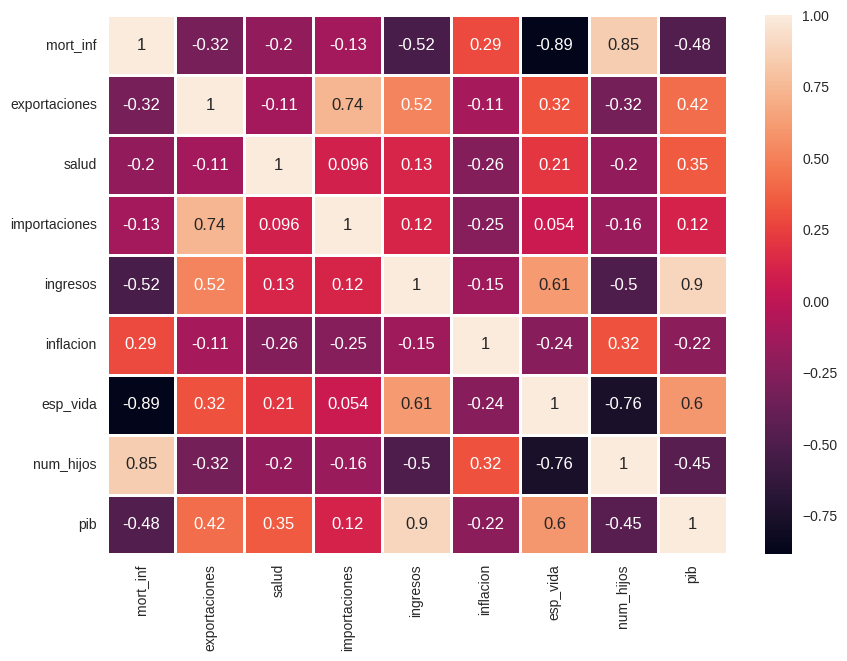

<Axes: >

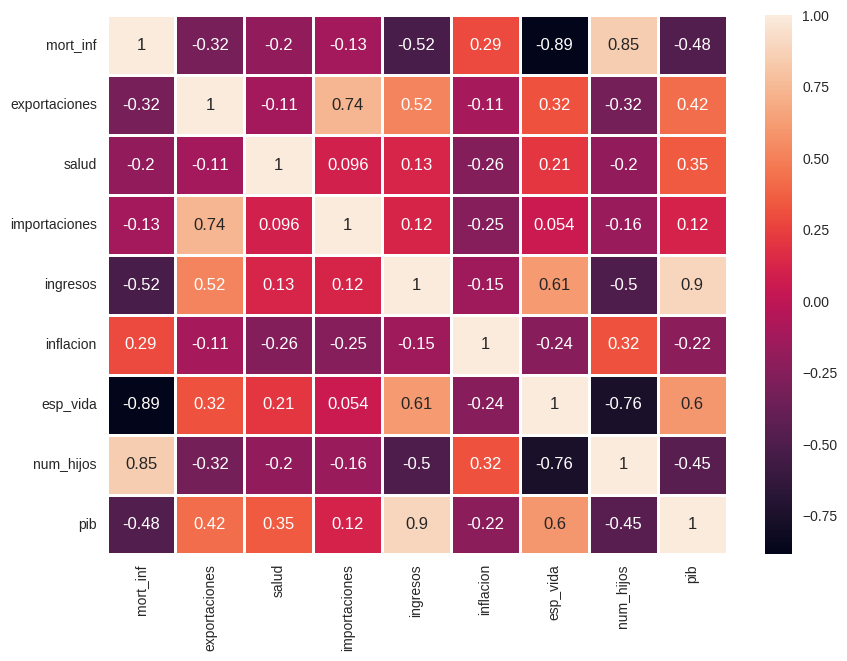

In [378]:
# Visualizamos la correlación entre las columnas númericas. Pudiendo obserbar la gran correlación que existe entre el número de
# hijos y la mortalidad infantil, el pib según los ingresos y la esperanza de vida según la mortalidad infantil.
plt.figure(figsize=(10,7))
sb.heatmap(df.corr(numeric_only=True),annot=True,linewidths=2)

### Preprocessing

In [379]:
# Visualizamos si existe algun nulo, en este caso no hay ninguno.
df.isnull().sum()

pais             0
mort_inf         0
exportaciones    0
salud            0
importaciones    0
ingresos         0
inflacion        0
esp_vida         0
num_hijos        0
pib              0
dtype: int64

pais             0
mort_inf         0
exportaciones    0
salud            0
importaciones    0
ingresos         0
inflacion        0
esp_vida         0
num_hijos        0
pib              0
dtype: int64

In [380]:
# Borramos la columna pais, ya que es un valor categórico que no nos aporta información relevante.
df = df.drop('pais', axis=1)

# Visualizamos las 10 primeras líneas del dataframe
df.head(10)

,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


,mort_inf,exportaciones,salud,importaciones,ingresos,inflacion,esp_vida,num_hijos,pib
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


## 3. Creación de los modelos, entrenamiento, predicciones y representación gráfica

### K-means

In [381]:
# Escalamos los datos, para que nos los escale entre los valores 0 y 1, lo que nos ayuda a evitar resultados estraños.

sc = StandardScaler()
X = sc.fit_transform(df)

In [382]:
# Generamos una lista, donde almacenaremos la distorsión para cada valor de K de 2 a 14.

distorsion = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distorsion.append(kmeanModel.inertia_)

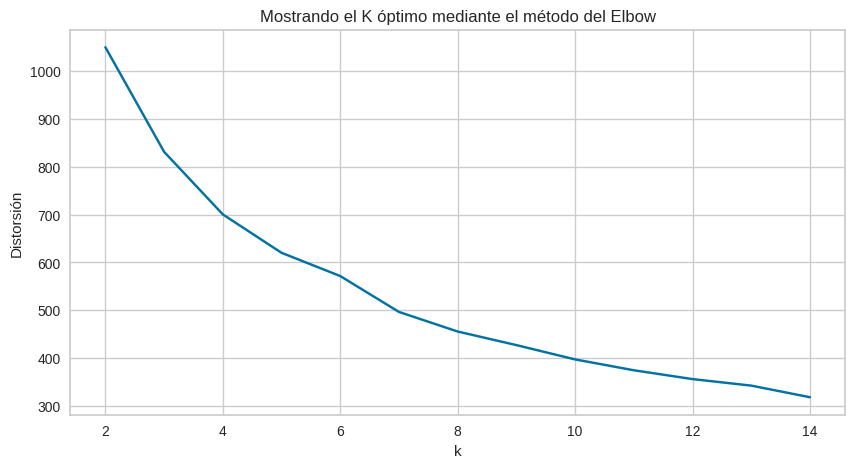

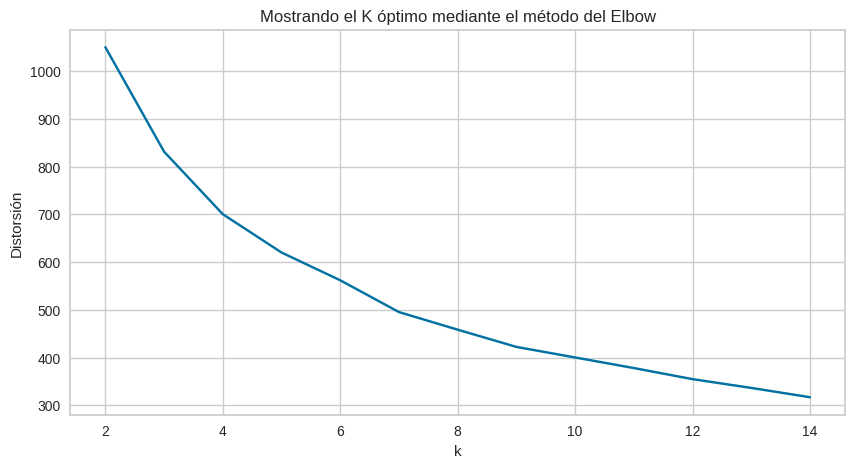

In [383]:
# Representamos gráficamente la lista de las diferentes distorsiónes por cada K, analizando la evolución segun el valor de K.

plt.figure(figsize=(10,5))
plt.plot(K, distorsion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

In [384]:
# Almacenamos en la lista 'scores' los valores de score para cada K, desde 2 a 14.
scores = list()
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
    del(kmeans)

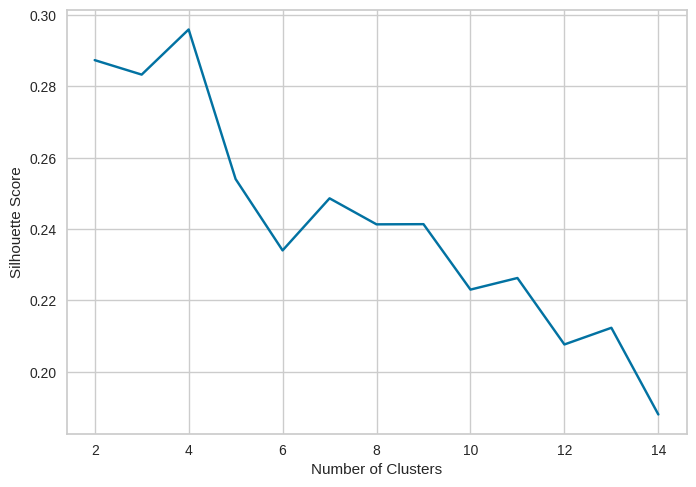

In [385]:
# Representamos graficamente la evolución del score según el valor de K

plt.plot(list(range(2, 15)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

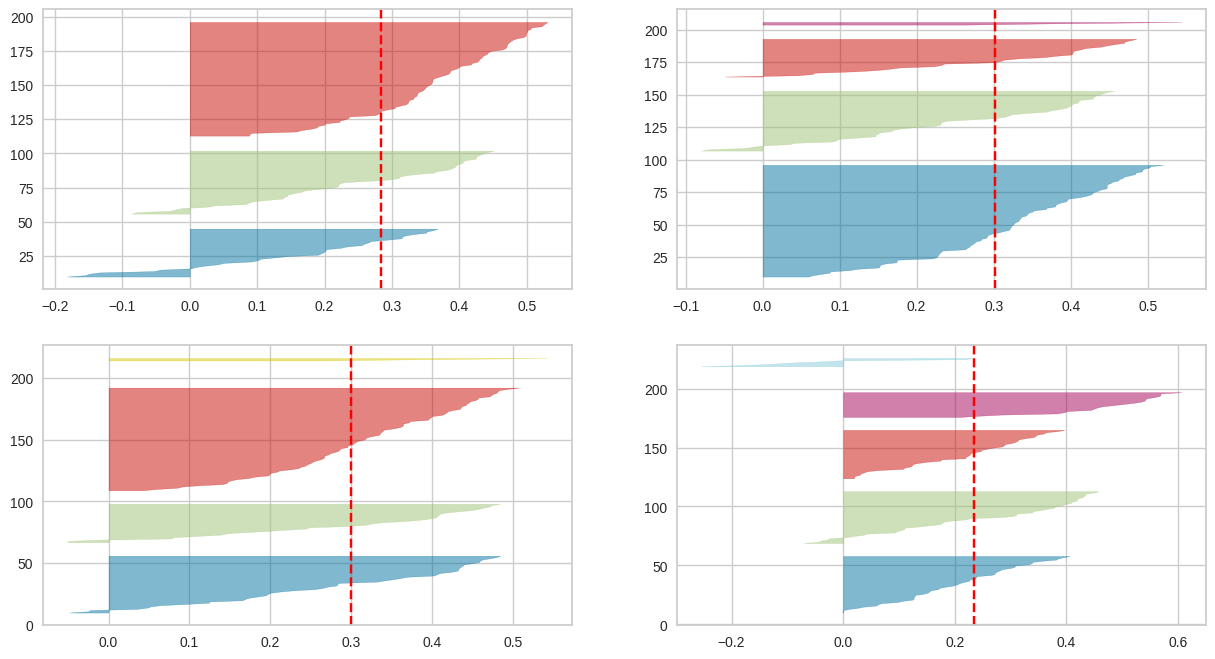

In [386]:
# Creamos la figura 2x2 con tamaño 15x8
fig, ax = plt.subplots(2, 2, figsize=(15,8))

# Hacemos un bucle sobre esos cuatro valores de K
for i in [3, 4, 5, 6]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-1, 2)
    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    # Alimentamos el visualizador
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [387]:
# Al representar las tres gráficas podemos sacar varias conclusiones, esta última no nos realiza la gráfica correctamente con los valores de k,
# esto se puede deber a que los valores que contiene el dataframe no son suficientes para formar otro cluster. Con lo cual podemos obtener el valor de
# K con las otras dos gráficas, con la gráfica del Elbow  podemos observar que el número de clusters estará entre 4 y 5, ya que si analizamos donde se forma el 'codo' cualquiera de los
# dos valores sería correcto. Al no tener un valor fijo realizamos el Silhouette Score, ya que nos ayudará a tomar la decisión basandonos en el score de cada
# valor de K. Tras representarlo gráficamente podemos observar que el k=4 es mejor que 5 en cuanto al score, con lo cual el valor de k será 4.

In [388]:
# Creamos el modelo con el valor de k = 4 comentado anteriormente
k=4
kmeans = KMeans(n_clusters=k)

In [389]:
# Realizamos las predicciones
y_pred = kmeans.fit_predict(X)

In [390]:
# Calculamos los diversos centroides de cada cluster y los imprimimos
centroides = kmeans.cluster_centers_
print(centroides)

[[-0.82860929  0.17262066  0.85918977 -0.29637276  1.46227512 -0.47818851
   1.10764922 -0.76368146  1.66190214]
 [-0.41103452  0.0076087  -0.20315863  0.04911688 -0.21707832 -0.03332883
   0.24812404 -0.43375408 -0.33115921]
 [ 1.38209405 -0.44902617 -0.17115749 -0.1972886  -0.69747801  0.40850458
  -1.27706228  1.39559546 -0.60950969]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]]


## 4. PCA (2 puntos)

In [391]:
# Creamos el modelo y ponemos 0,95 de varianza.
pca = PCA(n_components=0.95)

In [392]:
# Reducimos los datos y obtenemos una lista con los datos reducidos. Los cuales volcaremos
# de nuevo al kmeans, para comprobar si existe mejora.
X_reduced = pca.fit_transform(X)
X_reduced

array([[-2.91302459,  0.09562058, -0.7181185 ,  1.00525464, -0.15831004,
        -0.25459744],
       [ 0.42991133, -0.58815567, -0.3334855 , -1.16105859,  0.17467732,
         0.08457863],
       [-0.28522508, -0.45517441,  1.22150481, -0.8681145 ,  0.15647465,
        -0.4016955 ],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, -1.07409791,  1.17608067,
         0.05160677],
       [-1.88745106, -0.10945301,  1.10975159,  0.05625677,  0.61836532,
        -0.54091719],
       [-2.86406392,  0.48599799,  0.22316658,  0.81636436, -0.27406773,
         0.20137816]])

In [393]:
# Generamos una lista, donde almacenaremos la distorsión para cada valor de K de 2 a 14.
distorsion = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_reduced)
    distorsion.append(kmeanModel.inertia_)

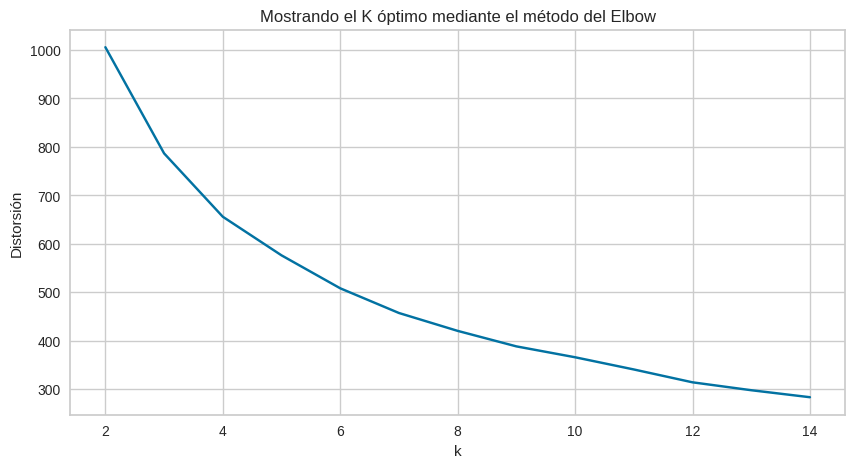

In [394]:
# Representamos gráficamente la lista de las diferentes distorsiónes por cada K, analizando la evolución segun el valor de K.
plt.figure(figsize=(10,5))
plt.plot(K, distorsion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Mostrando el K óptimo mediante el método del Elbow')
plt.show()

In [395]:
# Almacenamos en la lista 'scores' los valores de score para cada K, desde 2 a 14.
scores_pca = list()
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_reduced)
    scores_pca.append(silhouette_score(X_reduced, kmeans.labels_, metric='euclidean'))
    del(kmeans)

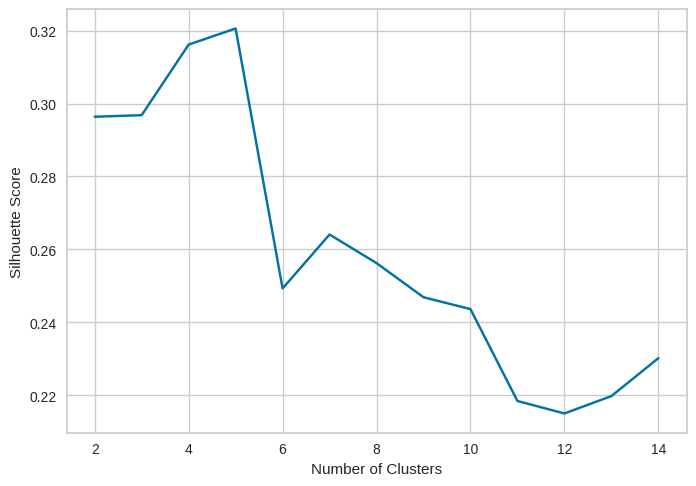

In [396]:
# Representamos graficamente la evolución del score según el valor de K
plt.plot(list(range(2, 15)), scores_pca)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

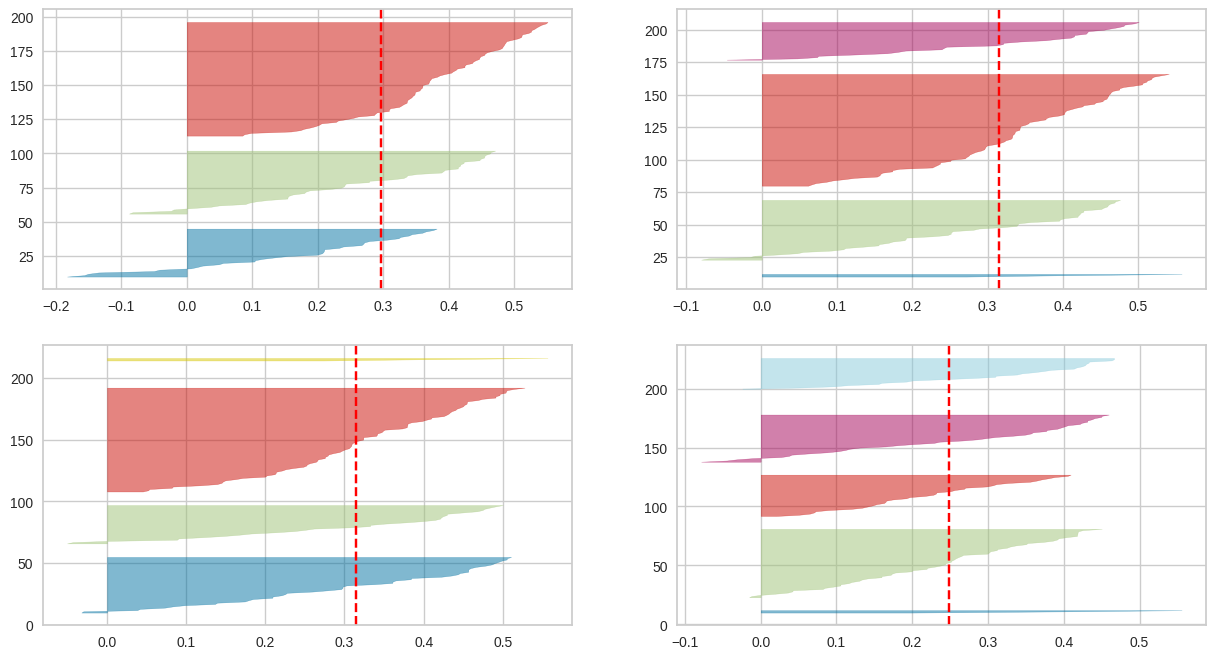

In [397]:
# Creamos la figura 2x2 con tamaño 15x8
fig, ax = plt.subplots(2, 2, figsize=(15,8))

# Hacemos un bucle sobre esos cuatro valores de K
for i in [3, 4, 5, 6]:
    # Creamos una instancia del modelo K-Means en función del valor de K
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-1, 2)
    # Creamos una instancia de "SilhouetteVisualizer" con la instancia KMeans anterior
    # Alimentamos el visualizador
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_reduced)

In [398]:
# Tras reducir los datos y pasarselos de nuevo al kmeans podemos observar que a la hora de sacar el número
# de clusters hay un cambio y es que ahora nos sale como el cluster mas óptimo 5. Esto puede pasar ya que a la
# hora de reducir los datos puede causar que los datos queden dispersos lo que provocará que se generen más grupos.
# Igualmente es correcto ya que se trata de un cambio mínimo comparandolo con los datos sin reducir

In [399]:
# Creamos el modelo con el valor de k = 5
kmeans = KMeans(n_clusters=5)

In [400]:
# Realizamos las predicciones
y_pred_pca = kmeans.fit_predict(X_reduced)

In [401]:
# Realizamos un bucle para generar los scores antes y después de reducir los datos.
print('\t','sin reducir --- reducidos')
for i in range (0, 13):
  print(f"K: {i + 2}\t {scores[i].round(4)}\t {scores_pca[i].round(4)}")

	 sin reducir --- reducidos
K: 2	 0.2874	 0.2964
K: 3	 0.2833	 0.2968
K: 4	 0.296	 0.3162
K: 5	 0.254	 0.3206
K: 6	 0.234	 0.2493
K: 7	 0.2486	 0.2641
K: 8	 0.2413	 0.2562
K: 9	 0.2414	 0.2469
K: 10	 0.223	 0.2436
K: 11	 0.2263	 0.2184
K: 12	 0.2076	 0.215
K: 13	 0.2123	 0.2198
K: 14	 0.188	 0.2302


In [402]:
# Tras reducir los datos podemos observar que si que existe una mejorar respecto a los datos sin reducir, es cierto que es una mejora mínima pero existente.
# Podemos observar que a la hora de comparar los scores, los scores de los datos reducidos son un poco mejores que los sin reducir, también podriamos comparar
# la mejorar con el tiempo, pero al ser un dataset tan pequeño es incomparable.

## 5. Conclusiones (2 puntos)

In [403]:
# ¿Qué información le podemos hacer llegar a Amancio?

In [404]:
# Para sacar mejor una conclusión realizo una gráfica donde se pueden ver las situaciones de los 4 clusters, respecto a los ingresos y esperanza de vida.
# Escogi esos datos para sacar la conclusión ya que creo que son datos muy significativos a la hora de decir si un país es pobre y necesita ayuda para su mejora.
# En la gráfica podemos ver claramente que el cluster 3 tiene los peores datos a la hora de ingresos, situación que se repite en la esperanza de vida, estadísticas que nos
# indican que son el país más desfavorido y que necesita más ayuda respecto a los otros.

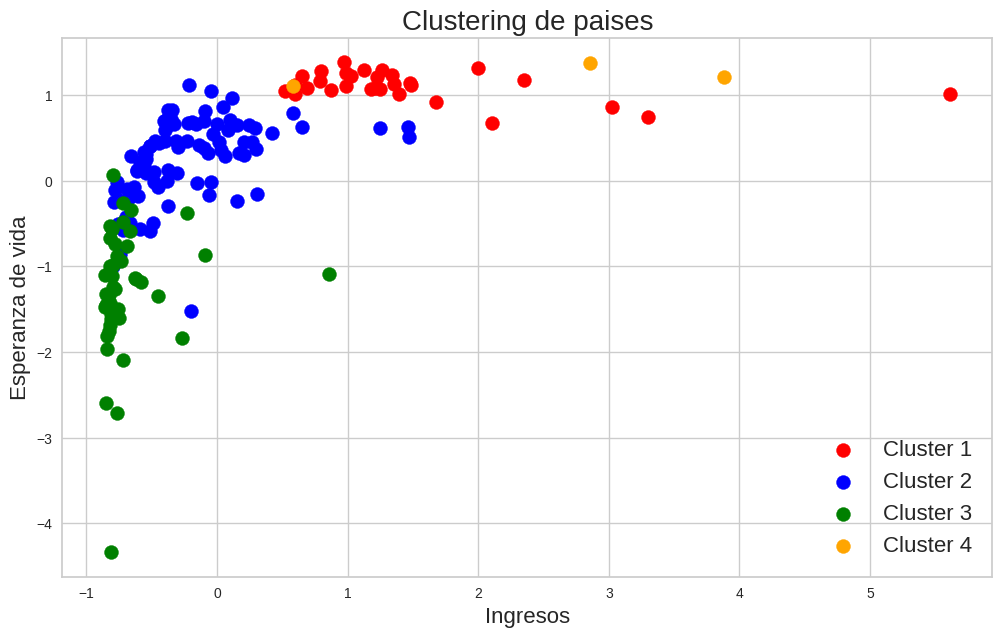

In [405]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_pred == 0, 4], X[y_pred == 0, 6], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 4], X[y_pred == 1, 6], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 4], X[y_pred == 2, 6], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 4], X[y_pred == 3, 6], s = 100, c = 'orange', label = 'Cluster 4')
plt.title('Clustering de paises',fontsize=20)
plt.xlabel('Ingresos',fontsize=16)
plt.ylabel('Esperanza de vida',fontsize=16)
plt.legend(fontsize=16)
plt.show()